In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/april_combined_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,...,TAXI_OUT,WHEELS_OFF,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,11.0,559.0,0.0,0.0,NaN,0.0,96.0,87.0,569.0,3
1,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,12.0,715.0,0.0,0.0,NaN,0.0,102.0,89.0,569.0,3
2,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,10.0,906.0,0.0,0.0,NaN,0.0,108.0,94.0,569.0,3
3,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,9.0,1343.0,0.0,0.0,NaN,0.0,100.0,101.0,569.0,3
4,1998,2,4,1,3,AA,ABQ,NM,DFW,TX,...,12.0,1647.0,0.0,0.0,NaN,0.0,104.0,102.0,569.0,3


In [ ]:
r1 = df.shape
df.drop(columns = ['QUARTER', 'CANCELLATION_CODE', 'ACTUAL_ELAPSED_TIME'], inplace = True)
r2 = df.shape

print(f"The number of constant/irrelevant/leaky_columns we dropped {r1[1] - r2[1]}")


The number of constant/irrelevant/leaky_columns we dropped 3


In [ ]:
r1 = df.shape[0]
r2 = df.dropna().shape[0]

print(f"The total number of rows initially {r1}")
print(f"The total number of rows after droping all rows containing any NaN value {r2}")

print(f"The percentage of data points lost {(r1-r2)*100/r1:.2f} %")

The total number of rows initially 2308855
The total number of rows after droping all rows containing any NaN value 2260511
The percentage of data points lost 2.09 %


# **Attributes**

*  ***Month:*** Represents the month of the year, ranging from 1 (January) to 12
(December).


* ***Day of the Month:*** Specifies the day of the month, ranging from 1 to 31.

* ***Day of the Week:*** Indicates the day of the week, where 1 corresponds to Monday and 7 to Sunday.

* ***Dep_Time:*** Departure time recorded in minutes.

* ***Origin:*** The airport code (3-character unique identifier) of the flight's departure location.

* ***Dest:*** The airport code (3-character unique identifier) of the flight's arrival location.

* ***Dep_Del15:*** Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Arr_Del15:*** Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

* ***Cancelled:*** A Boolean value indicating whether the flight was canceled.

* ***Diverted:*** A Boolean value indicating whether the flight was rerouted.

* ***Air_Time:*** The total time in minutes from takeoff to landing.

* ***Distance:*** The distance traveled by the flight, measured in miles.

* ***Distance_Group:*** A categorical classification of flight distances into predefined ranges. For example:

  * Short-haul flights (0–250 miles)

  * Medium-haul flights (251–500 miles)

  * Long-haul flights (501–1000 miles)

  * Very long-haul flights (1001+ miles)


  

# Columns we are interested in:

In [ ]:
df.shape

(2308855, 20)

In [ ]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_STATE_ABR', 'DEP_TIME',
       'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT', 'WHEELS_OFF', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'DISTANCE_GROUP'],
      dtype='object')

In [ ]:
#creating the dataframe with Column Name and Unique Values
unique_values = pd.DataFrame({
    'Column Name': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns]
})


print(unique_values)


          Column Name  Unique Values
0                YEAR              5
1               MONTH              1
2        DAY_OF_MONTH             30
3         DAY_OF_WEEK              7
4   OP_UNIQUE_CARRIER             12
5              ORIGIN            230
6    ORIGIN_STATE_ABR             51
7                DEST            229
8      DEST_STATE_ABR             51
9            DEP_TIME           1417
10          DEP_DEL15              2
11    DEP_DELAY_GROUP             15
12           TAXI_OUT            283
13         WHEELS_OFF           1416
14          ARR_DEL15              2
15          CANCELLED              2
16           DIVERTED              2
17   CRS_ELAPSED_TIME            504
18           DISTANCE           1164
19     DISTANCE_GROUP             11


In [ ]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
count,2.308855e+06,2308855.0,2.308855e+06,2.308855e+06,2.265411e+06,2.265411e+06,2.265411e+06,2.265411e+06,2.265252e+06,2.260670e+06,2.308855e+06,2.308855e+06,2.308842e+06,2.308855e+06,2.308855e+06
mean,2.000024e+03,4.0,1.550948e+01,3.940797e+00,1.350217e+03,1.594629e-01,4.676458e-02,1.524942e+01,1.371126e+03,1.992980e-01,1.881625e-02,2.053399e-03,1.271402e+02,7.439306e+02,3.447796e+00
std,1.394001e+00,0.0,8.655023e+00,2.001780e+00,4.840688e+02,3.661073e-01,1.707352e+00,1.009182e+01,4.867113e+02,3.994726e-01,1.358757e-01,4.526790e-02,6.962120e+01,5.629357e+02,2.225243e+00
min,1.998000e+03,4.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.600000e+01,2.100000e+01,1.000000e+00
25%,1.999000e+03,4.0,8.000000e+00,2.000000e+00,9.290000e+02,0.000000e+00,-1.000000e+00,1.000000e+01,9.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,3.280000e+02,2.000000e+00
50%,2.000000e+03,4.0,1.600000e+01,4.000000e+00,1.335000e+03,0.000000e+00,0.000000e+00,1.300000e+01,1.348000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,5.900000e+02,3.000000e+00
75%,2.001000e+03,4.0,2.300000e+01,6.000000e+00,1.742000e+03,0.000000e+00,0.000000e+00,1.800000e+01,1.757000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+02,9.870000e+02,4.000000e+00
max,2.002000e+03,4.0,3.000000e+01,7.000000e+00,2.400000e+03,1.000000e+00,1.200000e+01,1.439000e+03,2.400000e+03,1.000000e+00,1.000000e+00,1.000000e+00,6.700000e+02,4.962000e+03,1.100000e+01


In [ ]:
#Is there any null values?
df.isnull().sum()

,0
YEAR,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
ORIGIN,0
ORIGIN_STATE_ABR,0
DEST,0
DEST_STATE_ABR,0
DEP_TIME,43444


# What is the best way to handle missing values?

**Approach 1**: Using mean when skewness is low and median when skewness is high

**Approach 2**: Use mean for all columns

**Approach 3**: Use median for all columns

**Approach 4**: Drop any row that contains NaN values

In [ ]:

def handle_missing_values(df, app_number):
    # Step 1: Remove duplicate rows first
    df = df.drop_duplicates()

    # Step 2: Fill missing values in the target column 'ARR_DEL15' using its median
    # We use the median to keep the target class (y) to be binary. If we repalce with mean -> we might end up with continuous values which is undesirable.
    df.loc[:, 'ARR_DEL15'] = df['ARR_DEL15'].fillna(df['ARR_DEL15'].mode()[0])

    # Step 3: Handle missing values
    if app_number == 1:
        df_app = df.copy()
        # Approach 1: We will use skewness to determine whether to fill missing values with mean(mean for low skew) or median(median for high skew)
        for column in df.select_dtypes(include=['number']).columns:
            if df_app[column].skew() < 1:  # If skewness is low --> use mean
                df_app[column] = df_app[column].fillna(df_app[column].mean())
            else:  # If skewness is high --> use median
                df_app[column] = df_app[column].fillna(df_app[column].median())

    elif app_number == 2:
        # Approach 2: Replace all numeric missing values with the mean
        df_app = df.copy()
        for column in df.select_dtypes(include=['number']).columns:
            df_app[column] = df_app[column].fillna(df_app[column].mean())

    elif app_number == 3:
        # Approach 3: Similar to Approach 2 (Replace all numeric missing values with the mean)
        df_app = df.copy()
        for column in df.select_dtypes(include=['number']).columns:
            df_app[column] = df_app[column].fillna(df_app[column].mean())

    elif app_number == 4:
        # Approach 4: Remove rows that contain any missing values
        df_app = df.dropna()

    else:
        raise ValueError("Invalid app_number. Please choose a value between 1 and 4.")

    return df_app

# Understanding the Correlation between Attributes

In [ ]:
df["DEP_DEL15"] = df["DEP_DEL15"].astype('category')
df["ARR_DEL15"] = df["ARR_DEL15"].astype('category')
df["DIVERTED"] = df["DIVERTED"].astype('category')
df["CANCELLED"] = df["CANCELLED"].astype('category')

In [ ]:
df.select_dtypes(include = 'number').corr()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
YEAR,1.000000,NaN,-0.002309,-0.021155,-0.008828,-0.042802,0.014291,-0.008109,0.018751,0.004007,0.004172
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,-0.002309,NaN,1.000000,0.012754,-0.002094,-0.031122,-0.013556,-0.001967,-0.000690,0.000781,0.000759
DAY_OF_WEEK,-0.021155,NaN,0.012754,1.000000,0.009010,0.039545,-0.010790,0.008173,0.014636,0.014643,0.015129
DEP_TIME,-0.008828,NaN,-0.002094,0.009010,1.000000,0.193139,0.054451,0.975197,-0.033169,-0.037564,-0.038232
DEP_DELAY_GROUP,-0.042802,NaN,-0.031122,0.039545,0.193139,1.000000,0.050672,0.182539,-0.001467,-0.000136,0.000004
TAXI_OUT,0.014291,NaN,-0.013556,-0.010790,0.054451,0.050672,1.000000,0.080683,0.215561,0.176021,0.173554
WHEELS_OFF,-0.008109,NaN,-0.001967,0.008173,0.975197,0.182539,0.080683,1.000000,-0.030970,-0.038585,-0.039343
CRS_ELAPSED_TIME,0.018751,NaN,-0.000690,0.014636,-0.033169,-0.001467,0.215561,-0.030970,1.000000,0.984709,0.973438
DISTANCE,0.004007,NaN,0.000781,0.014643,-0.037564,-0.000136,0.176021,-0.038585,0.984709,1.000000,0.987391


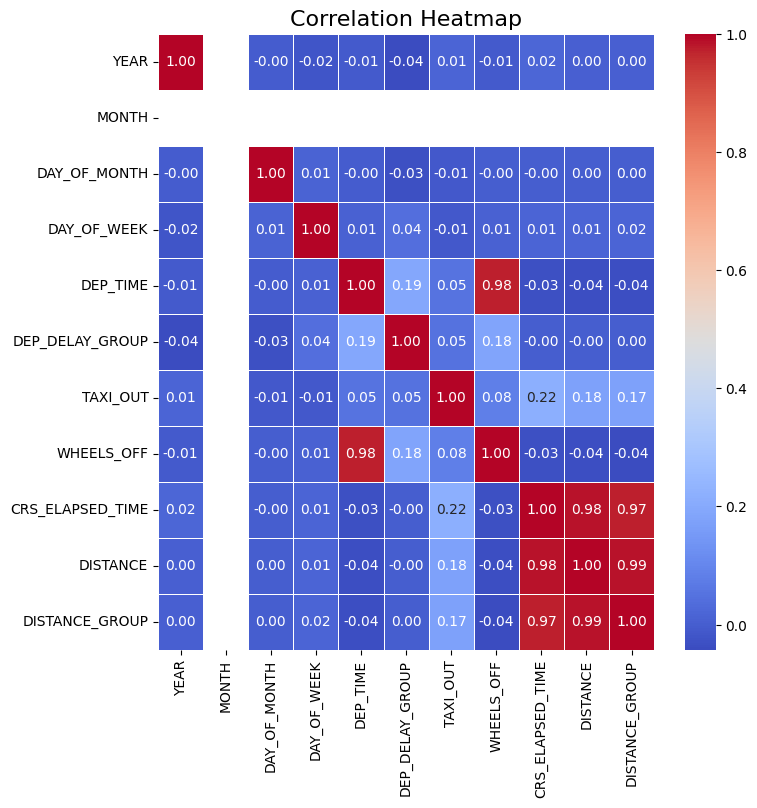

In [ ]:

corr_matrix = df.select_dtypes('number').corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Understanding the Distribution of our Target Class

**Observation:** - Class Imbalance

The distribution shows class imbalance where the number of instances with 0 (negative class) is significantly higher than those with 1 (positive class)

Due to this, accuracy might not be the best metric to evaluate any model's performance. Let's focus on Precission, Recall and F-1 Score

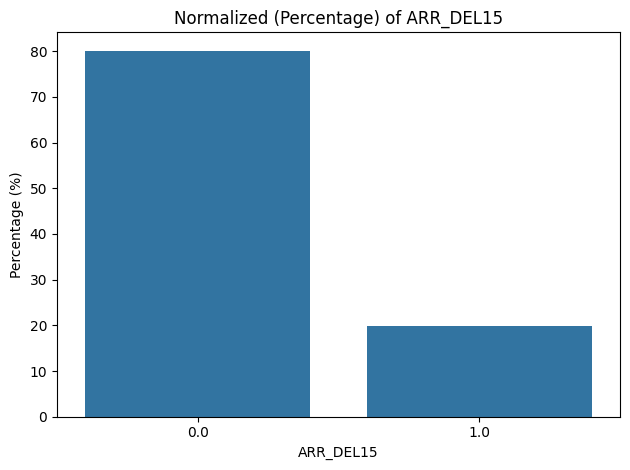

In [ ]:

import seaborn as sns

# Selecting an approach 4 to handle missing values
app_number = 4
df_cleaned = handle_missing_values(df, app_number)

# removing the target variables after handling missing values
target = df_cleaned['ARR_DEL15']

target_counts = target.value_counts()
target_percent = target.value_counts(normalize=True) * 100



sns.barplot(x=target_percent.index, y=target_percent.values)
plt.title("Normalized (Percentage) of ARR_DEL15")
plt.xlabel("ARR_DEL15")
plt.ylabel("Percentage (%)")


plt.tight_layout()


# Outlier Detection

**Observation:** The dataset size reduced by roughly 35% has a significant impact on model performance. For now -  I m not removing these data points from our df. Let's decide later.


In [ ]:
import pandas as pd


def remove_outliers_iqr(df):

    df_no_outliers = df.copy()

    # Step 1: Iterating through each numeric column to calculate the Interquartile Range (IQR) and identifying outliers
    for col in df.select_dtypes(include=['number']).columns:

        # we have calculated the 25th (Q1) and 75th (Q3) percentiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Step 2: Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1  # Interquartile range between the 25th and 75th percentiles

        # Step 3: Define the lower and upper bounds for identifying outliers
        lower_bound = Q1 - 3 * IQR  # Any value below this is considered as an outlier
        upper_bound = Q3 + 3 * IQR  # Any value above this is considered as an outlier

        # Step 4: Filter the dataframe to retain only values within the defined bounds
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers

# Call the function to remove outliers from the dataset using IQR method
df_no_outliers = remove_outliers_iqr(df)

# Print the original and filtered DataFrame shapes for comparison
print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {df_no_outliers.shape}")


Original Data Shape: (2308855, 20)
Filtered Data Shape: (2108582, 20)


In [ ]:
print(f"Percentage of Outlier Values {100 - 100 * df_no_outliers.shape[0] / df.shape[0]}")

Percentage of Outlier Values 8.674126352672644


**Colab Session is not able to handle 2.3 Million rows for Violin Plot**

### Let's not run the below cell

In [ ]:
'''

# Creating a violin plot to visualize the distribution and potential outliers
plt.figure(figsize=(15, 10))
# You can select a single column or multiple columns(entire dataframe)
sns.violinplot(data=df_cleaned) # Visualizing the distribution of the entire dataset
plt.title('Violin Plot for Outlier Detection')
plt.show()

'''

"\n\n# Creating a violin plot to visualize the distribution and potential outliers\nplt.figure(figsize=(15, 10))\n# You can select a single column or multiple columns(entire dataframe)\nsns.violinplot(data=df_cleaned) # Visualizing the distribution of the entire dataset\nplt.title('Violin Plot for Outlier Detection')\nplt.show()\n\n"

# Data Integration

In [ ]:
# Function to convert flight data into DDMMYYYYIATA format
def convert_to_ddmmyyyy_iata_flight(row):
    # Extract day, month, year, and origin airport code
    day = str(row['DAY_OF_MONTH']).zfill(2)  # Ensure day is two digits
    month = str(row['MONTH']).zfill(2)  # Ensure month is two digits
    year = str(row['YEAR'])  # Four digit year
    origin = row['ORIGIN']  # Origin airport code

    # Combine them into DDMMYYYYIATA format
    formatted_date = f"{day}{month}{year}{origin}"

    return formatted_date

# Apply the conversion to each row and create the new column
df_cleaned['DDMMYYYYIATA'] = df_cleaned.apply(convert_to_ddmmyyyy_iata_flight, axis=1)

# Display the result (first few rows)
print(df_cleaned[['YEAR', 'MONTH', 'DAY_OF_MONTH', 'ORIGIN', 'DDMMYYYYIATA']].head())

print(len(df_cleaned))

   YEAR  MONTH  DAY_OF_MONTH ORIGIN DDMMYYYYIATA
0  1998      4             1    ABQ  01041998ABQ
1  1998      4             1    ABQ  01041998ABQ
2  1998      4             1    ABQ  01041998ABQ
3  1998      4             1    ABQ  01041998ABQ
4  1998      4             1    ABQ  01041998ABQ
2265248


In [ ]:
# === Load datasets ===
weather_df = pd.read_csv("/content/FinalizedWeather_Data.csv")
weather_df.head()

,TEMP,DEWP,SLP,VISIB,GUST,PRCP,FRSHTT,DDMMYYYYIATA,WEATHER_CONDITION
0,70.1,67.9,1015.4,5.4,99.9,0.29,10000,01041999AAF,rainy
1,71.0,68.0,1016.3,6.3,99.9,0.38,100000,02041999AAF,rainy
2,68.1,65.7,1016.6,7.0,99.9,0.01,100000,03041999AAF,rainy
3,70.1,66.8,1017.2,4.5,99.9,0.01,100000,04041999AAF,rainy
4,72.1,67.6,1016.8,6.1,99.9,0.01,100000,05041999AAF,foggy


In [ ]:
import pandas as pd
from tqdm import tqdm

# === Parameters ===
start_index = 0
chunk_size = 500_000
output_prefix = "/content/Merge_part"

# === Rename weather columns to avoid collision ===
weather_df = weather_df.add_prefix("WEATHER_")
weather_df.rename(columns={"WEATHER_DDMMYYYYIATA": "DDMMYYYYIATA"}, inplace=True)

# === Sort and set index for faster matching ===
weather_df.sort_values(by="DDMMYYYYIATA", inplace=True)
df_cleaned.sort_values(by="DDMMYYYYIATA", inplace=True)
weather_df.set_index("DDMMYYYYIATA", inplace=True)

# === Merge process ===
merged_chunk = []
file_index = (start_index // chunk_size) + 1

for i in tqdm(range(start_index, len(df_cleaned)), desc="Merging", ncols=100):
    flight_row = df_cleaned.iloc[i]
    flight_key = flight_row["DDMMYYYYIATA"]

    # Find matching weather record
    if flight_key in weather_df.index:
        weather_row = weather_df.loc[flight_key]
        if isinstance(weather_row, pd.DataFrame):
            weather_row = weather_row.iloc[0]
        # Combine both rows into a single Series with no duplicate columns
        merged_row = pd.concat([flight_row, weather_row])
    else:
        merged_row = flight_row

    merged_chunk.append(merged_row)

    if len(merged_chunk) >= chunk_size or i == len(df_cleaned) - 1:
        out_df = pd.DataFrame(merged_chunk)
        out_df.to_csv(f"{output_prefix}{file_index}.csv", index=False)
        print(f"Saved {output_prefix}{file_index}.csv with {len(out_df)} records.")
        file_index += 1
        merged_chunk = []


Merging:  22%|█████████▎                                | 500192/2265248 [04:04<25:16:59, 19.39it/s]

Saved /content/Merge_part1.csv with 500000 records.


Merging:  44%|██████████████████                       | 1000243/2265248 [08:07<14:36:21, 24.06it/s]

Saved /content/Merge_part2.csv with 500000 records.


Merging:  66%|███████████████████████████▏             | 1500000/2265248 [12:52<19:35:03, 10.85it/s]

Saved /content/Merge_part3.csv with 500000 records.


Merging:  88%|█████████████████████████████████████     | 2000264/2265248 [16:52<3:10:03, 23.24it/s]

Saved /content/Merge_part4.csv with 500000 records.


Merging: 100%|██████████████████████████████████████████| 2265248/2265248 [18:59<00:00, 1987.19it/s]

Saved /content/Merge_part5.csv with 265248 records.


In [ ]:
import pandas as pd
import glob
import os

# === Folder and pattern where your chunked files are stored ===
folder_path = '.'  # Use "." if you're in the same folder
file_pattern = os.path.join(folder_path, '/content/Merge_part*.csv')

# === Grab all matching CSV file paths ===
csv_files = sorted(glob.glob(file_pattern))  # Sort to maintain order

print(f"Found {len(csv_files)} files to merge.")

# === Read and concatenate ===
final_df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
print(len(final_df))
final_df.head()

Found 5 files to merge.
2265248


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,DEP_TIME,...,DISTANCE_GROUP,DDMMYYYYIATA,WEATHER_TEMP,WEATHER_DEWP,WEATHER_SLP,WEATHER_VISIB,WEATHER_GUST,WEATHER_PRCP,WEATHER_FRSHTT,WEATHER_WEATHER_CONDITION
0,1998,4,1,3,UA,ABE,PA,ORD,IL,1309.0,...,3,01041998ABE,68.7,61.0,1008.8,8.8,21.0,0.0,111110.0,stormy
1,1998,4,1,3,UA,ABE,PA,ORD,IL,919.0,...,3,01041998ABE,68.7,61.0,1008.8,8.8,21.0,0.0,111110.0,stormy
2,1998,4,1,3,UA,ABE,PA,ORD,IL,1719.0,...,3,01041998ABE,68.7,61.0,1008.8,8.8,21.0,0.0,111110.0,stormy
3,1998,4,1,3,US,ABE,PA,CLT,NC,819.0,...,2,01041998ABE,68.7,61.0,1008.8,8.8,21.0,0.0,111110.0,stormy
4,1998,4,1,3,US,ABE,PA,PIT,PA,729.0,...,2,01041998ABE,68.7,61.0,1008.8,8.8,21.0,0.0,111110.0,stormy


# Which is the best encoding for our situation?

We tried 3 types of encoding


1.   One Hot Encoding
2.   Frequency Encoding
3.   Label Encoding
4.   Ordinal Encoding

  

In [ ]:
# X= pd.get_dummies(X, columns=['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST'], drop_first=True, dtype = int)
# for col in ['ORIGIN', 'DEST']:
#     freq_map = X[col].value_counts(normalize=True)  # Get category frequencies
#     X[col] = X[col].map(freq_map)  # Replace category with its frequency

In [ ]:
final_df = final_df.drop(columns=['DDMMYYYYIATA'], errors='ignore')

In [ ]:
final_df.select_dtypes('O').head()

,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,WEATHER_WEATHER_CONDITION
0,UA,ABE,PA,ORD,IL,stormy
1,UA,ABE,PA,ORD,IL,stormy
2,UA,ABE,PA,ORD,IL,stormy
3,US,ABE,PA,CLT,NC,stormy
4,US,ABE,PA,PIT,PA,stormy


In [ ]:
final_df.ORIGIN_STATE_ABR.unique()

array(['PA', 'NM', 'AK', 'GA', 'NY', 'TX', 'NC', 'MI', 'CT', 'ME', 'AL',
       'MT', 'ND', 'TN', 'ID', 'MA', 'LA', 'VT', 'CA', 'MD', 'SC', 'OH',
       'IA', 'CO', 'WV', 'KY', 'FL', 'VA', 'MN', 'OR', 'NJ', 'SD', 'IN',
       'WA', 'WI', 'HI', 'KS', 'WY', 'MS', 'NV', 'AR', 'NE', 'MO', 'IL',
       'NH', 'OK', 'AZ', 'RI', 'PR', 'UT', 'VI'], dtype=object)

In [ ]:
final_df.DEST_STATE_ABR.unique()

array(['IL', 'NC', 'PA', 'GA', 'KY', 'MI', 'MO', 'TX', 'MN', 'CO', 'FL',
       'AZ', 'CA', 'NV', 'UT', 'AK', 'ME', 'VA', 'NM', 'WA', 'AR', 'OR',
       'NY', 'RI', 'TN', 'AL', 'LA', 'OK', 'NE', 'WI', 'OH', 'VI', 'NJ',
       'SC', 'MD', 'PR', 'IN', 'MS', 'HI', 'MA', 'CT', 'NH', 'IA', 'SD',
       'ID', 'MT', 'KS', 'WY', 'ND', 'VT', 'WV'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split


# Handling missing values in the DataFrame using the approach 4
app_number = 4
final_df = handle_missing_values(final_df, app_number)

# Prepare features (X) and target (y) for modeling
X = final_df.drop(columns=['ARR_DEL15'])
y = final_df['ARR_DEL15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
final_df.head()

## Encoding only using Traning data and then transform Test data

Label Encoder cannot handle values which are first time appearing in test data (Unseen Data). Also, Ordinal Encoder is better suited for feature encoding (X columns) when compared to Label Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# =========================
# Shared encoder for ORIGIN and DEST
# =========================
airport_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
airport_encoder.fit(X_train[['ORIGIN', 'DEST']])

X_train[['ORIGIN', 'DEST']] = airport_encoder.transform(X_train[['ORIGIN', 'DEST']])
X_test[['ORIGIN', 'DEST']] = airport_encoder.transform(X_test[['ORIGIN', 'DEST']])

# =========================
# Shared encoder for ORIGIN_STATE_ABR and DEST_STATE_ABR
# =========================
state_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
state_encoder.fit(X_train[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']])

X_train[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']] = state_encoder.transform(
    X_train[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']]
)
X_test[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']] = state_encoder.transform(
    X_test[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR']]
)

# =========================
# Encoder for OP_UNIQUE_CARRIER
# =========================
carrier_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
carrier_encoder.fit(X_train[['OP_UNIQUE_CARRIER']])

X_train[['OP_UNIQUE_CARRIER']] = carrier_encoder.transform(X_train[['OP_UNIQUE_CARRIER']])
X_test[['OP_UNIQUE_CARRIER']] = carrier_encoder.transform(X_test[['OP_UNIQUE_CARRIER']])

# =========================
# Encoder for OP_UNIQUE_CARRIER
# =========================
weather_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
weather_encoder.fit(X_train[['WEATHER_WEATHER_CONDITION']])

X_train[['WEATHER_WEATHER_CONDITION']] = weather_encoder.transform(X_train[['WEATHER_WEATHER_CONDITION']])
X_test[['WEATHER_WEATHER_CONDITION']] = weather_encoder.transform(X_test[['WEATHER_WEATHER_CONDITION']])


NameError: name 'X_train' is not defined

In [ ]:
# # We have initialized the LabelEncoder for encoding categorical variables
# label_encoder = LabelEncoder()
# label_encoder.fit(pd.concat([df_cleaned['ORIGIN'], df_cleaned['DEST']]))

# # Applying the LabelEncoder transformation to 'ORIGIN' and 'DEST' columns to convert them into numeric labels
# df_cleaned['ORIGIN'] = label_encoder.transform(df_cleaned['ORIGIN'])
# df_cleaned['DEST'] = label_encoder.transform(df_cleaned['DEST'])

# all_states = pd.concat([df_cleaned['ORIGIN_STATE_ABR'], df_cleaned['DEST_STATE_ABR']])
# state_encoder = LabelEncoder().fit(all_states)

# df_cleaned['ORIGIN_STATE_ABR'] = state_encoder.transform(df_cleaned['ORIGIN_STATE_ABR'])
# df_cleaned['DEST_STATE_ABR'] = state_encoder.transform(df_cleaned['DEST_STATE_ABR'])


# remaining_cat_cols = ['OP_UNIQUE_CARRIER']
# label_encoders = {}

# for col in remaining_cat_cols:
#     le = LabelEncoder()
#     df_cleaned[col] = le.fit_transform(df_cleaned[col])
#     label_encoders[col] = le

### One more possible data leakage is I m encoding before train test split - there is a high chance of model learning about all categories even ones that exist only in test - kind of like cheating.

# Logistic Regression Model

## Why did we scale the data for Logistic Regression?



1.   Gradient Descent Convergence - it was not converging earlier because of different scales
2.   Improved interpretability - all features contribute equally to the model



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: '27042000IND'

# Decision Tree Classification

## Does scaling affect DT Classifier?

As you can see, it is invariance to sclaing. Whether you scale or not, the splits made by the decision tree will remain the same because the algorithm simply compares feature values.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
# Training the model on the non-scaled training data
model.fit(X_train, y_train)

# Predicting the target values (y) for the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.8829

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    362778
         1.0       0.70      0.72      0.71     90272

    accuracy                           0.88    453050
   macro avg       0.82      0.82      0.82    453050
weighted avg       0.88      0.88      0.88    453050



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predicting the target values for the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))
# print(classification_report[1]['precision'])

Accuracy: 0.8829

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    362778
         1.0       0.70      0.72      0.71     90272

    accuracy                           0.88    453050
   macro avg       0.82      0.82      0.82    453050
weighted avg       0.88      0.88      0.88    453050



## eXtreme Gradient Boosting : XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing the XGBoost Classifier model
model = XGBClassifier(random_state=42, enable_categorical=True)

# Training the model on the non-scaled training data
model.fit(X_train, y_train)

# Predicting the target values (y) for the non-scaled test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.9259

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    362778
         1.0       0.89      0.72      0.79     90272

    accuracy                           0.93    453050
   macro avg       0.91      0.85      0.87    453050
weighted avg       0.92      0.93      0.92    453050



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing the XGBoost Classifier model
model = XGBClassifier(random_state=42)

# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predicting the target values (y) for the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.9259

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    362778
         1.0       0.89      0.72      0.79     90272

    accuracy                           0.93    453050
   macro avg       0.91      0.85      0.87    453050
weighted avg       0.92      0.93      0.92    453050



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Training the model on the non-scaled training data
model.fit(X_train, y_train)

# Predicting the target values (y) for the non-scaled test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.9250

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    362778
         1.0       0.88      0.72      0.79     90272

    accuracy                           0.92    453050
   macro avg       0.91      0.85      0.87    453050
weighted avg       0.92      0.92      0.92    453050



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predicting the target values (y) for the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.9206

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    270101
         1.0       0.88      0.72      0.80     73372

    accuracy                           0.92    343473
   macro avg       0.91      0.85      0.87    343473
weighted avg       0.92      0.92      0.92    343473



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Support Vector Machine (SVM) Classifier model
model = SVC(random_state=42)

# Training the model on the non-scaled training data
model.fit(X_train, y_train)

# Predicting the target values (y) for the non-scaled test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Support Vector Machine (SVM) Classifier model
model = SVC(random_state=42)

# Training the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predicting the target values (y) for the test set
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Naive Bayes Classifier model
model = GaussianNB()

# Training the model on the non-scaled training data
model.fit(X_train, y_train)

# Predicting the target values (y) for the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print(classification_report(y_test, y_pred))

Accuracy: 0.9090

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    362778
         1.0       0.79      0.74      0.76     90272

    accuracy                           0.91    453050
   macro avg       0.86      0.85      0.85    453050
weighted avg       0.91      0.91      0.91    453050



# **Feed Forward Neural Network**

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Predict on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# =========================
# Preprocessing for categorical features (using OrdinalEncoder)
# =========================
categorical_cols = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR']

# Create encoders
encoders = {}
for col in categorical_cols:
    encoders[col] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_train[[col]] = encoders[col].fit_transform(X_train[[col]])
    X_test[[col]] = encoders[col].transform(X_test[[col]])

# =========================
# Separate categorical and numerical features
# =========================
X_train_cat = X_train[categorical_cols]
X_train_num = X_train.drop(columns=categorical_cols)
X_test_cat = X_test[categorical_cols]
X_test_num = X_test.drop(columns=categorical_cols)

# =========================
# Standardize numerical features
# =========================
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# =========================
# Define the model with Embedding layers
# =========================
input_cat = []
embedding_layers = []

for col in categorical_cols:
    # Input layer for the categorical feature
    input_layer = keras.layers.Input(shape=(1,))  # Shape (1,) for a single categorical value
    input_cat.append(input_layer)

    # Embedding layer
    num_unique_values = len(encoders[col].categories_[0])  # Get the number of unique values
    embedding_dim = min(50, (num_unique_values + 1) // 2)  # Choose an appropriate embedding dimension
    embedding_layer = keras.layers.Embedding(input_dim=num_unique_values + 1, output_dim=embedding_dim)(input_layer)
    embedding_layers.append(embedding_layer)

# Flatten the embedding layers
embedding_output = keras.layers.concatenate(embedding_layers)
embedding_output = keras.layers.Flatten()(embedding_output)

# Input layer for numerical features
input_num = keras.layers.Input(shape=(X_train_num_scaled.shape[1],))

# Concatenate numerical and embedding features
merged_features = keras.layers.concatenate([embedding_output, input_num])

# Build the rest of the network
hidden_layer1 = keras.layers.Dense(128, activation='relu')(merged_features)
hidden_layer2 = keras.layers.Dense(64, activation='relu')(hidden_layer1)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_layer2)

# Create the model
model = keras.Model(inputs=[*input_cat, input_num], outputs=output_layer)

# =========================
# Compile and train the model
# =========================
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(
    [X_train_cat[col] for col in categorical_cols] + [X_train_num_scaled],
    y_train,
    epochs=10,
    batch_size=32
)

# =========================
# Predict and evaluate
# =========================
y_pred_probs = model.predict([X_test_cat[col] for col in categorical_cols] + [X_test_num_scaled])
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')
print(classification_report(y_test, y_pred))

# Understanding the impact of different scaling techniques on these two models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, classification_report


# Define scalers
scalers = {
    'none': None,
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'normal': Normalizer()
}

# Define models
models = {
    'LR': LogisticRegression(max_iter=1000),
    'DT': DecisionTreeClassifier(random_state=42)
}

# List to store results for dataframe
results = []

# Loop through each scaler and model
for scaler_name, scaler in scalers.items():

    if scaler is not None:
      X_train_scaled = scaler.fit_transform(X_train)
      X_test_scaled = scaler.transform(X_test)
    else:
      X_train_scaled = X_train
      X_test_scaled = X_test

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        report = classification_report(y_test, y_pred, output_dict=True)

        results.append({
        'Model': model_name,
        'Scaler': scaler_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 1)': report['1.0']['precision'],
        'Recall (Class 1)': report['1.0']['recall'],
        'F1-Score (Class 1)': report['1.0']['f1-score']
    })

# Convert results to a DataFrame for nice display
results_df = pd.DataFrame(results)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results_df

,Model,Scaler,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,LR,none,0.914259,0.866409,0.673542,0.757898
1,DT,none,0.882931,0.699933,0.721985,0.710788
2,LR,standard,0.915848,0.848590,0.703119,0.769036
3,DT,standard,0.882894,0.699849,0.721874,0.710691
4,LR,minmax,0.912921,0.844199,0.690391,0.759587
5,DT,minmax,0.883017,0.700141,0.722206,0.711002
6,LR,normal,0.815674,0.836635,0.093096,0.167549
7,DT,normal,0.880468,0.696302,0.709600,0.702888


# Answering Interesting Questions

## Q1) In this specific year, what are the top 10 busiest airports?

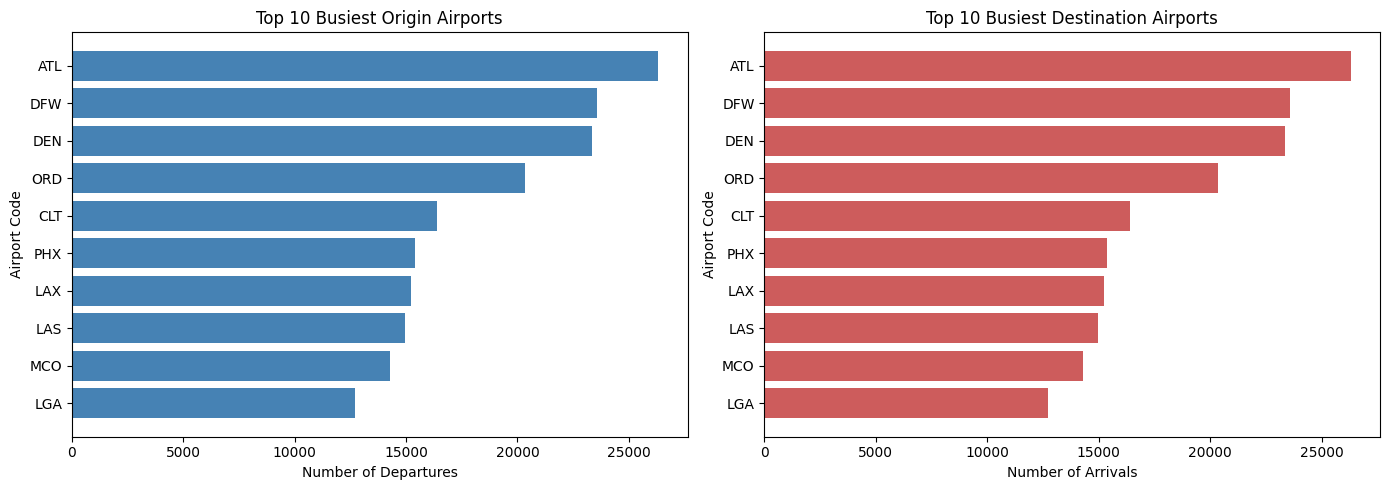

In [ ]:
# We have taken the top 10 busiest origin airports based on the number of departures
top_origins = df['ORIGIN'].value_counts().head(10)
# We have taken the top 10 busiest destination airports based on the number of arrivals
top_destinations = df['DEST'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# We have plotted the horizontal bar chart for top origin airports
axes[0].barh(top_origins.index[::-1], top_origins.values[::-1], color='steelblue')
axes[0].set_title('Top 10 Busiest Origin Airports')
axes[0].set_xlabel('Number of Departures')
axes[0].set_ylabel('Airport Code')

# We have plotted the horizontal bar chart for top destination airports
axes[1].barh(top_destinations.index[::-1], top_destinations.values[::-1], color='indianred')
axes[1].set_title('Top 10 Busiest Destination Airports')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Airport Code')

plt.tight_layout()
plt.show()


**Observation:**


1.  There is no major directional bias in the flight data.
2.  If an airport is primarily a hub, you'd expect a very close match between take-offs and landings.



## Q2) What is the average delay time for each airline?


In [ ]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,1,1,1,ABE,ATL,558.0,0.0,0.0,0.0,0.0,102.0,692.0,3
1,1,1,1,ABE,ATL,1240.0,0.0,0.0,0.0,0.0,99.0,692.0,3
2,1,1,1,ABE,CLT,558.0,0.0,0.0,0.0,0.0,78.0,481.0,2
3,1,1,1,ABE,CLT,1442.0,1.0,1.0,0.0,0.0,77.0,481.0,2
4,1,1,1,ABE,CLT,1700.0,0.0,0.0,0.0,0.0,73.0,481.0,2


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Merged_April_Flight_Weather.csv')  # Change filename if needed

# Define selected WEATHER_* columns
selected_weather_cols = [
    'WEATHER_VISIB',
    'WEATHER_PRCP',
    'WEATHER_TEMP',
    'WEATHER_GUST',
    'WEATHER_FRSHTT'
]

# List of columns that start with "WEATHER_"
weather_columns = [col for col in df.columns if col.startswith('WEATHER_')]

# Keep only the selected WEATHER_* columns and implicitly keep all other non-WEATHER_* columns
columns_to_keep = [col for col in df.columns if col in selected_weather_cols or not col.startswith('WEATHER_')]

# Drop the DDMMYYYYIATA column if it exists
columns_to_keep = [col for col in columns_to_keep if col != 'DDMMYYYYIATA']

# Filter the dataset
df_filtered = df[columns_to_keep]

df_filtered['WEATHER_VISIB'] = df_filtered['WEATHER_VISIB'].fillna(df_filtered['WEATHER_VISIB'].mean())
df_filtered['WEATHER_PRCP'] = df_filtered['WEATHER_PRCP'].fillna(0)
df_filtered['WEATHER_TEMP'] = df_filtered['WEATHER_TEMP'].fillna(df_filtered['WEATHER_TEMP'].mean())
df_filtered['WEATHER_GUST'] = df_filtered['WEATHER_GUST'].fillna(df_filtered['WEATHER_GUST'].mean())
df_filtered['WEATHER_FRSHTT'] = df_filtered['WEATHER_FRSHTT'].fillna(0)

df_filtered.to_csv('Final_data.csv', index=False)

print("Filtered dataset saved with selected WEATHER_* columns and other columns.")


<ipython-input-1-ce789aa08a12>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WEATHER_VISIB'] = df_filtered['WEATHER_VISIB'].fillna(df_filtered['WEATHER_VISIB'].mean())
<ipython-input-1-ce789aa08a12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WEATHER_PRCP'] = df_filtered['WEATHER_PRCP'].fillna(0)
<ipython-input-1-ce789aa08a12>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Filtered dataset saved with selected WEATHER_* columns and other columns.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Final_data.csv')

# Check for the target column
if 'ARR_DEL15' not in df.columns:
    raise ValueError("Expected 'ARR_DEL15' column (0 or 1) for prediction target.")

# Separate features and target
df = df.dropna(subset=['ARR_DEL15'])
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Fill missing values for numeric columns (mean)
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].mean())

# Fill missing values for categorical columns (mode)
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Preprocessor: Scaling for numeric, encoding for categorical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:17:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9674

Confusion Matrix:
 [[356819   5271]
 [  9482  80562]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    362090
         1.0       0.94      0.89      0.92     90044

    accuracy                           0.97    452134
   macro avg       0.96      0.94      0.95    452134
weighted avg       0.97      0.97      0.97    452134

